# Abstract

Thirty-three months of daily reading rate data collected by a second-language learner of Mandarin Chinese is analyzed to evaluate growth of mean reading rate as a function of total time spent reading. Two models for this function are fit to the data: (1) a linear model and (2) an exponential decay model where mean reading asymptotically approaches that of a native speaker. Confidence regions for the parameters of these models are plotted, and these confidence regions are then used to (1) evaluate how much growth in mean reading rate has already been achieved and (2) estimate how much further reading will be necessary to reach a reading rate that is comparable to a native speaker. Despite high variance in measured reading rates, it is concluded that after 270 hours of reading the mean reading rate has increased between 52 to 122 percent and anywhere between 700 and 3000 hours of further reading will be necessary to achieve a reading rate comparable to that of a native speaker.

In [1]:
# Import Python libraries needed for analysis.
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import scipy.stats

# 1. Introduction and Project Objectives

I study Mandarin Chinese as a hobby. My Chinese reading rate is still slow compared to that of a native speaker, so I've been spending about 20 minutes a day reading in Chinese for a couple years. Every time I've sat down to read I've measured (1) how long I spent reading and (2) how many Chinese characters I've read, thus allowing me to track my reading rate as a function of total time spent reading. The focus of this project will be to analyze this data in an attempt to answer the following questions:

1. How much can I confidently say my reading rate has improved after this practice?
2. What model of reading rate as a function of total time spent reading appears to fit my reading data best? A linear model may fit the data well, but this would imply that my reading rate increase has remained constant over time. A possibly more reasonable alternative would be an exponential decay model where my reading rate asymptotically approaches that of a native speaker. This model would better capture diminishing returns: Increases in reading rate can only be accomplished via exposure to rarer and rarer vocabulary, and the only way to achieve this exposure is via greater and greater amounts of time spent reading. 
3. Assuming that the previously determined best-fit model is correct, when can I expect to reach a reading rate comparable to that of a native speaker?

This project report is presented in the format of a [Jupyter Notebook](https://jupyter.org) with blocks of Python code interspersed throughout, but programming experience is not necessary to understand the conclusions I have made.

# 2. Literature Review

## 2.1 Second-Language Reading Rate Increases
No studies were found that assessed reading rates increases of second-language learners continuously over time. (Beglar and Hunt 2014) summarized several studies that examined reading rate increases of English as a Second-Language (ESL) students who undertook intensive reading programs. Of the ten studies described, however, all of them only assessed student reading rates at the beginning and end of the reading program.

## 2.2 Chinese Native Speaker Reading Rates
(Trauzettel-Klosinski and Dietz 2012) found that Chinese native speakers read aloud at an average rate of 255 Chinese characters per minute (CPM) with a standard deviation of 29 CPM. This rate is presumably significantly slower than if the test participants read silently, but it is a good estimate of the reading rate a non-native speaker could achieve with extensive practice. 

## 2.3 Zipf's Law

Zipf's law is an empirical observation that the probability of encountering any given word is inversely proportional to its rank in the word frequency for table in that language (Murphy 2012). If the log of word rank is plotted versus the log of word frequency, a straight line relationship should be observed if Zipf's law holds for the language. The plot below ([Sergio Jimenez/Wikimedia, CC BY-SA 4.0](https://commons.wikimedia.org/wiki/File:Zipf_30wiki_en_labels.png)) shows such a relationship holds for many languages when Wikipedia is used as a corpus.

![](zipf_law.png)

# 3. Methods

## 3.1 Data Collection

I collected the data used in this project while reading material from three Mandarin language sources:

1. The [*Remembrance of Earth's Past*](https://en.wikipedia.org/wiki/Remembrance_of_Earth%27s_Past)《地球往事》trilogy by Liu Cixin (often referred to as the *Three Body Problem* trilogy, after the name of the first book). Started March 2016 and finished October 2017.
2. [*Wolf Totem*](https://en.wikipedia.org/wiki/Wolf_Totem)《狼图腾》by Jiang Rong. Started November 2017 and finished September 2018.
3. ["InTouch Today"](https://view.news.qq.com/)（今日话题）, a daily news essay published by [Tencent](https://en.wikipedia.org/wiki/Tencent) that discusses various topics relevant to current events and society in China. Started reading in September 2018, continuing until the present (December 2018).

I read only on my Android phone, and the time I spent reading every day was measured by an app ([QualityTime](http://www.qualitytimeapp.com/)) that tracks and reports phone usage data. I attempted to read as quickly as possible while comprehending the material enough so that I could hypothetically produce an English translation. When I encountered a sentence I could not understand, I would continue reading to the end of the sentence, attempting the infer the meaning of any unknown words. If I was still unable to infer the meaning of any unknown words, I would look them up in a Chinese-English dictionary app ([Pleco](https://www.pleco.com/)). Time spent looking up words in the dictionary app was not counted towards the daily time spent reading and thus did not affect the reading rate measurements. In the rare instances I was still unable to understand a sentence after exhausting the information in my dictionary app, I would continue on to the next sentence.

## 3.2 Linear Model

The reading rate for any particular reading session (number of characters read divided by time spent reading, [CPM]) is dependent on internal factors (e.g., the size of your vocabulary and your reading comprehension ability) as well as external factors (e.g., fatigue and environmental distractions). The reading rate will vary from session to session due to variance in these internal and external factors, but a mean reading rate can be calculated and tracked over time.

The first of two proposed models for mean reading rate increase as a function of time spent reading is a simple linear model.

$$R(t) = R_0 + m t$$

Where:

* $R$ is the mean reading rate [CPM].
* $t$ is the total time spent reading [min].
* $R_0$ is the initial mean reading rate [CPM].
* $m$ is a linear coefficient [CPM/min].

The primary assumption inherent with the linear model is that on all time spent reading is equally effective towards increasing the mean reading rate. That is, if spending an hour reading increases your mean reading rate by 0.1 CPM at the start of a study program, then an hour spent reading after a year of practicing every day for an hour will still increase your mean reading rate by 0.1 CPM.

## 3.3 Exponential Decay Model

The linear model may work well for second-language learners at the start of an extensive reading practice program, but it may not work well for learners who have already spent hundreds of hours reading. Advanced learners experience diminishing returns, in which greater amounts of reading time are required for inducing an equivalent increase in the mean reading rate. For such learners an exponential model may be more appropriate for describing increases in the mean reading rate brought about by time spent reading.

$$R(t) = R_0 + (R_{max}-R_0)(1-e^{-kt})$$

Where:

* $R$ is the mean reading rate [CPM].
* $t$ is the total time spent reading [min].
* $R_0$ is the initial mean reading rate [CPM].
* $R_{max}$ is the maximum reading rate that the given second-language learner will be able to achieve [CPM]. As described in the literature review section, a value of 255 CPM is a good estimate for this parameter.
* $k$ is an exponential decay coefficient [min${}^{-1}$].

In the exponential decay model, the mean reading rate $R$ will asymptotically approach the maximum reading rate $R_{max}$ as the total reading practice time $t$ increases. A higher value for the exponential decay coefficient $k$ implies that $R$ will approach $R_{max}$ more quickly.

The exponential decay model above may be more appropriate than the linear model because of [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law). If one's reading rate is proportional to the size of one's vocabulary, and a word only becomes part of one's vocabulary when one has read it several times, then more and more reading will be required to learn rarer and rarer words. The simulation below demonstrates this phenomenon.

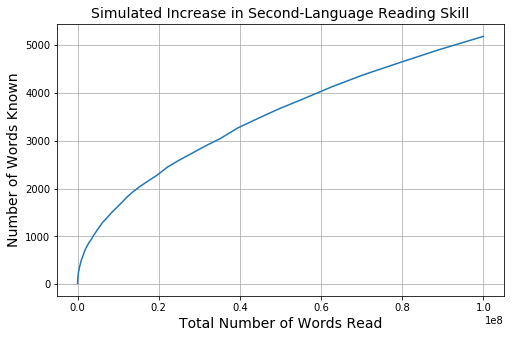

In [2]:
# number of random variables to sample from Zipf distribution
total_words = 10**8

# number of points to plot
num_plot_points = 100

# x-axis of plot
words_read = np.logspace(3, np.log10(total_words), num=num_plot_points)

# y-axis of plot
words_known = np.zeros(num_plot_points)

# Take sample of random variables from Zipf distribution.
r = scipy.stats.zipf.rvs(a=2, size=total_words)

# Take progressively larger subsets of the previously collected sample, noting how many values
# have occurred three or more times.
for i in range(num_plot_points):
    sample = r[:int(words_read[i])]
    unique, counts = np.unique(sample, return_counts=True)
    words_known[i] = counts[counts>2].size
    
# Plot results.
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(words_read, words_known)
ax.set_title('Simulated Increase in Second-Language Reading Skill', fontsize=14)
ax.set_xlabel('Total Number of Words Read', fontsize=14)
ax.set_ylabel('Number of Words Known', fontsize=14)
ax.grid()
plt.show()

In this simulation, a word is considered "known" when it has been encountered three or more times. Initially, when the language learner does not know many words, their vocabulary (and thus their reading ability) grows at a rapid rate. As their vocabulary grows, they must read more in order to be exposed to rarer words, and the growth in their reading ability tapers off.

## 3.4 Calculating Confidence Regions for the Parameters of a Fitted Model

Confidence regions for the $p$ parameters of any linear model

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_{p-1} X_{p-1}$$ 

can be determined (Draper and Smith 1998) via the equation 

$$S(\boldsymbol{\theta}) = S \left( \hat{\boldsymbol{\theta}} \right) \left [ 1 + \frac{p}{n-p} F(p,n-p,1-\alpha) \right ]$$

Where:

* $S$ is the sum of squared residuals.
* $\boldsymbol{\theta}$ is the vector of model parameters.
* $\hat{\boldsymbol{\theta}}$ is the best-fit vector of model parameters that minimizes the sum of squared squared residuals $S$.
* $F$ is the cumulative [F-distribution](https://en.wikipedia.org/wiki/F-distribution).
* $p$ is the number of model parameters.
* $n$ is the number of data points.
* $1 - \alpha$ is the confidence level of the confidence region.

The simple linear model described above has two fitted parameters, $R_0$ and $m$. If a plot in parameter space is made (where $R_0$ corresponds to one axis and $m$ corresponds to the other), selecting a constant value for $S$ results in an ellipse centered around the best-fit parameter values $\hat{\boldsymbol{\theta}} = (\hat{R}_0,\hat{m})$. It can be stated with a confidence level of $1 - \alpha$ that the true values for $R_0$ and $m$ are contained within the "confidence region" enclosed by this ellipse, subject to the following assumptions:

1. The fitted model is correct.
2. The error about the fitted model is normally distributed.

The exponential decay model described above also has two fitted parameters ($R_0$ and $k$), but it is not linear. For a nonlinear model, the contours will not necessarily be ellipsoidal and they will represent confidence regions with an *approximate* confidence level of $1 - \alpha$, subject to the same two assumptions listed above.

# 4. Results and Discussion

## 4.1 Data Import

Import reading data from the csv files. There are three files, corresponding to three sources of reading practice material:

1. `Remembrance_of_Earths_Past.csv`: The [*Remembrance of Earth's Past*](https://en.wikipedia.org/wiki/Remembrance_of_Earth%27s_Past) trilogy, by Liu Cixin.

2. `Wolf_Totem.csv`: [*Wolf Totem*](https://en.wikipedia.org/wiki/Wolf_Totem), by Jiang Rong.

3. `InTouch_Today.csv`: ["InTouch Today"](https://view.news.qq.com/), published by Tencent.

In [3]:
# Import reading data for Remembrance of Earth's Past.
rep_t = np.array([]) # total reading time [min]
rep_rr = np.array([]) # reading rate [cpm]

with open('Remembrance_of_Earths_Past.csv',newline='') as file_object:
    csv_data = csv.reader(file_object,delimiter=',')
    next(csv_data)
    for row in csv_data:
        rep_t = np.append(rep_t, float(row[1]))
        rep_rr = np.append(rep_rr, float(row[2]))

# Import reading data for Wolf Totem.
wt_t = np.array([]) # total reading time [min]
wt_rr = np.array([]) # reading rate [cpm]

with open('Wolf_Totem.csv',newline='') as file_object:
    csv_data = csv.reader(file_object,delimiter=',')
    next(csv_data)
    for row in csv_data:
        wt_t = np.append(wt_t, float(row[1]))
        wt_rr = np.append(wt_rr, float(row[2]))

# Import reading data for Tencent News "InTouch Today".
itt_t = np.array([]) # total reading time [min]
itt_rr = np.array([]) # reading rate [cpm]

with open('InTouch_Today.csv',newline='') as file_object:
    csv_data = csv.reader(file_object,delimiter=',')
    next(csv_data)
    for row in csv_data:
        itt_t = np.append(itt_t, float(row[1]))
        itt_rr = np.append(itt_rr, float(row[2]))

Next, plot the reading data.

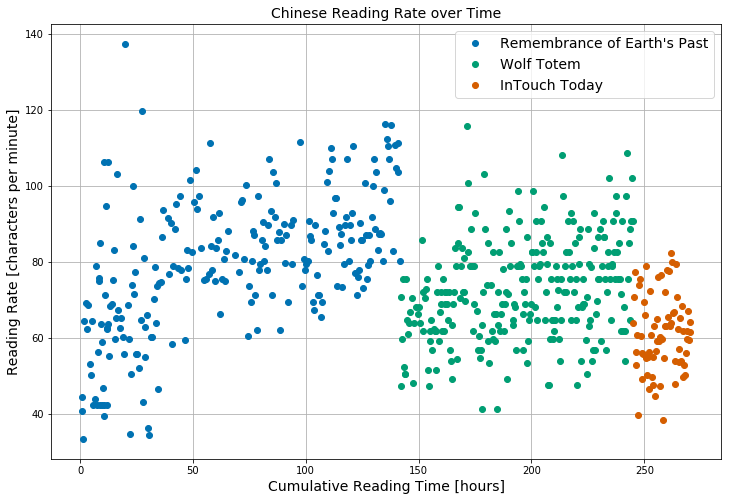

In [4]:
plt.style.use('seaborn-colorblind')
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(rep_t/60, rep_rr, 'o', label='Remembrance of Earth\'s Past')
ax.plot((wt_t+rep_t[-1])/60, wt_rr, 'o', label='Wolf Totem')
ax.plot((itt_t+rep_t[-1]+wt_t[-1])/60, itt_rr, 'o', label='InTouch Today')
ax.set_title('Chinese Reading Rate over Time', fontsize=14)
ax.set_xlabel('Cumulative Reading Time [hours]', fontsize=14)
ax.set_ylabel('Reading Rate [characters per minute]', fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.show()

The plot above suggests that:

1. Each source of reading material appears to have a unique level of difficulty.
2. From day to day, measured reading rates exhibit a high degree of variance.
3. The reading rate for each reading material source appears to be positively correlated with cumulative time spent reading material from that source.

## 4.2 Linear Model

Define functions used by linear model.

In [5]:
# Define function for linear model.
def lin_mod(t, R_0, m):
    """
    calculates R = mean reading rate [CPM]
    t = total time spent reading [min]
    R_0 = initial mean reading rate [CPM]
    m = linear coefficient [CPM/min]
    """
    R =  R_0 + m*t
    return R

# Define functions for calculating sum of squared residuals and R^2.
def ssr_lin(param, t, rr):
    """
    calculates ssr = sum of squared residuals [CPM^2]
    param = vector of parameters used by linear model (R_0, m)
    t = total time spent reading [min]
    rr = mean reading rate [CPM]
    """
    R_0 = param[0]
    m = param[1]
    resid = rr - lin_mod(t, R_0, m)
    return np.sum(resid**2)

def ssr_lin2(R0, m, t, rr):
    """
    calculates ssr = sum of squared residuals [CPM^2]
    param = vector of parameters used by linear model (R_0, m)
    t = total time spent reading [min]
    rr = mean reading rate [CPM]
    """
    resid = rr - lin_mod(t, R0, m)
    return np.sum(resid**2)

def r_sq(rr, ssr):
    """
    calculates R^2 value for model fit
    rr = mean reading rate [CPM]    
    ssr = sum of squared residuals [CPM^2]
    """
    # Calculate total sum of squares, tss [CPM^2].
    tss = np.sum((rr - np.mean(rr))**2)
    return 1 - (ssr/tss)

### 4.2.1 Linear Model Fit for *Remembrance of Earth's Past*

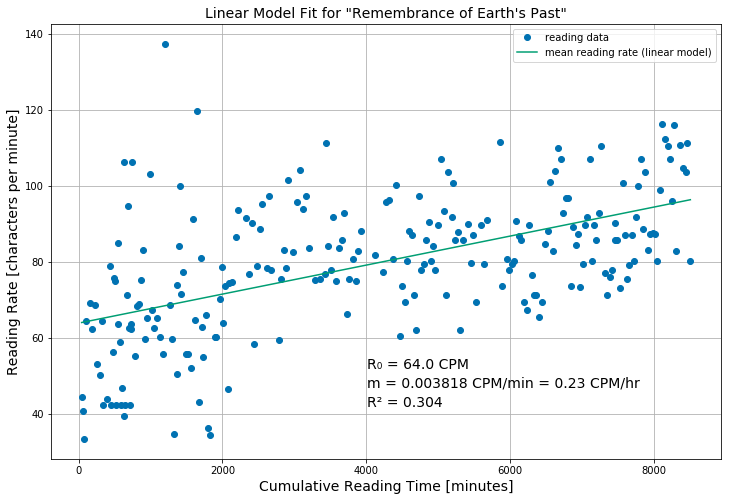

In [6]:
# Determine best-fit parameters for linear model.
rep_lin_bf = scipy.optimize.curve_fit(lin_mod, rep_t, rep_rr)[0]

# best-fit sum of squared residuals for linear model
rep_ssr_lin_bf = ssr_lin(rep_lin_bf, rep_t, rep_rr)

# R^2 for linear model fit
rep_r_sq = round(r_sq(rep_rr, rep_ssr_lin_bf), 3)

# linear model mean reading rate values
rep_lin_mod_rr = lin_mod(rep_t, rep_lin_bf[0], rep_lin_bf[1])

# Plot data and linear model fit.
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(rep_t, rep_rr, 'o', label='reading data')
ax.plot(rep_t, rep_lin_mod_rr, label='mean reading rate (linear model)')
ax.text(4010, 52, 'R₀ = '+str(round(rep_lin_bf[0], 1))+' CPM', fontsize=14)
ax.text(4010, 47, 'm = '+str(round(rep_lin_bf[1], 6))+' CPM/min = '+str(round(rep_lin_bf[1]*60, 2))+' CPM/hr',
        fontsize=14)
ax.text(4010, 42, 'R² = '+str(rep_r_sq), fontsize=14)
ax.set_title('Linear Model Fit for \"Remembrance of Earth\'s Past\"', fontsize=14)
ax.set_xlabel('Cumulative Reading Time [minutes]', fontsize=14)
ax.set_ylabel('Reading Rate [characters per minute]', fontsize=14)
plt.grid()
plt.legend()
plt.show()

A linear model appears to fit the data for the *Remembrance of Earth's Past* trilogy fairly well, although the $R^2$ value of 0.304 may not be considered high by some.

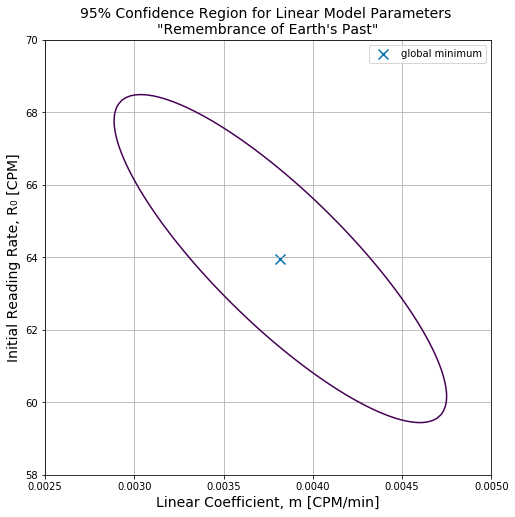

In [7]:
# resolution at which to map SSR in parameter space
R0_res = 110
m_res = 100

# axes in parameter space
R0_vals = np.linspace(58, 70, R0_res)
m_vals = np.linspace(0.0025, 0.005, m_res)

# Map SSR in parameter space.
rep_ssr_map = np.zeros((R0_res, m_res))
for i in range(R0_res):
    for j in range(m_res):
        rep_ssr_map[i,j] = ssr_lin([R0_vals[i], m_vals[j]], rep_t, rep_rr)

# Plot SSR contour corresponding to 95% confidence region.
n = rep_t.size
p = 2
conf_level = 0.95
ssr_threshold = rep_ssr_lin_bf*(1 + p/(n-p)*scipy.stats.f.ppf(q=conf_level, dfn=p, dfd=n-p))

fig,ax = plt.subplots(figsize=(8,8))

x,y = np.meshgrid(m_vals, R0_vals)
ax.contour(x, y, rep_ssr_map, [ssr_threshold])
ax.scatter(rep_lin_bf[1], rep_lin_bf[0], s=100, marker='x', label='global minimum')
ax.set_title('95% Confidence Region for Linear Model Parameters \n\"Remembrance of Earth\'s Past\"',
             fontsize=14)
ax.set_xlabel('Linear Coefficient, m [CPM/min]', fontsize=14)
ax.set_ylabel('Initial Reading Rate, R₀ [CPM]', fontsize=14)
ax.legend()
plt.grid()
plt.show()

Here is a plot in parameter space showing a 95 percent confidence region for the two fitted parameters: the initial mean reading rate $R_0$ and the linear model coefficient $m$. As expected for a linear model, the confidence region is an ellipse and the global minimum is located in the center.

Out of all the possible pairs of values for $R_0$ and $m$ represented on this plot, it can be stated with 95 percent confidence that the true pair of values lies inside the ellipsoidal region. At no point does the ellipse intersect with the $m=0$ axis, so I can disprove a null hypothesis stating that my reading rate has not improved at all.

In terms of evaluating how much my reading rate improved on a relative basis over the course of reading this book, two points at opposite ends of the ellipse present two plausible minimum and maximum scenarios:

* If $m = 0.00295$ CPM/min and $R_0 = 68.3$ CPM, then my reading rate improved 37%.
* If $m = 0.00469$ CPM/min and $R_0 = 59.5$ CPM, then my reading rate improved 67%.

### 4.2.2 Linear Model Fit for *Wolf Totem*

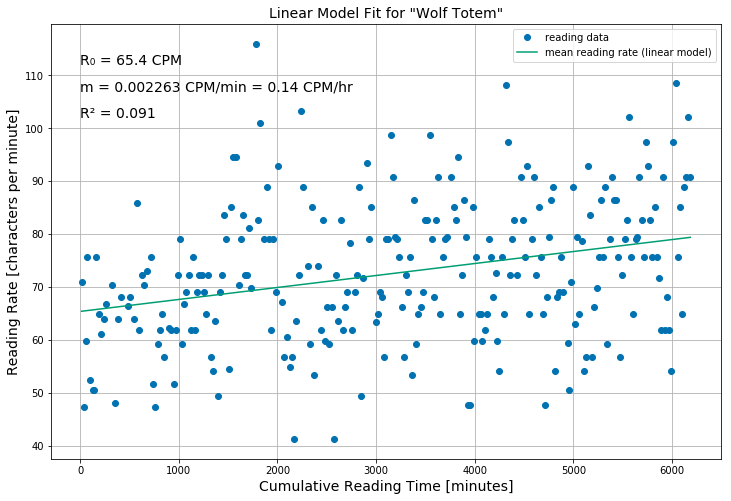

In [8]:
# Determine best-fit parameters for linear model.
wt_lin_bf = scipy.optimize.curve_fit(lin_mod, wt_t, wt_rr)[0]

# best-fit sum of squared residuals for linear model
wt_ssr_lin_bf = ssr_lin(wt_lin_bf, wt_t, wt_rr)

# R^2 for linear model fit
wt_r_sq = round(r_sq(wt_rr, wt_ssr_lin_bf), 3)

# linear model mean reading rate values
wt_lin_mod_rr = lin_mod(wt_t, wt_lin_bf[0], wt_lin_bf[1])

# Plot data and linear model fit.
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(wt_t, wt_rr, 'o', label='reading data')
ax.plot(wt_t, wt_lin_mod_rr, label='mean reading rate (linear model)')
ax.text(0, 112, 'R₀ = '+str(round(wt_lin_bf[0], 1))+' CPM', fontsize=14)
ax.text(0, 107, 'm = '+str(round(wt_lin_bf[1], 6))+' CPM/min = '+str(round(wt_lin_bf[1]*60, 2))+' CPM/hr',
        fontsize=14)
ax.text(0, 102, 'R² = '+str(wt_r_sq), fontsize=14)
ax.set_title('Linear Model Fit for \"Wolf Totem\"', fontsize=14)
ax.set_xlabel('Cumulative Reading Time [minutes]', fontsize=14)
ax.set_ylabel('Reading Rate [characters per minute]', fontsize=14)
plt.grid()
plt.legend()
plt.show()

A linear model also appears to fit the *Wolf Totem* data fairly well, although the $R^2$ value of 0.091 is even lower than that for the *Remembrance of Earth's Past* data.

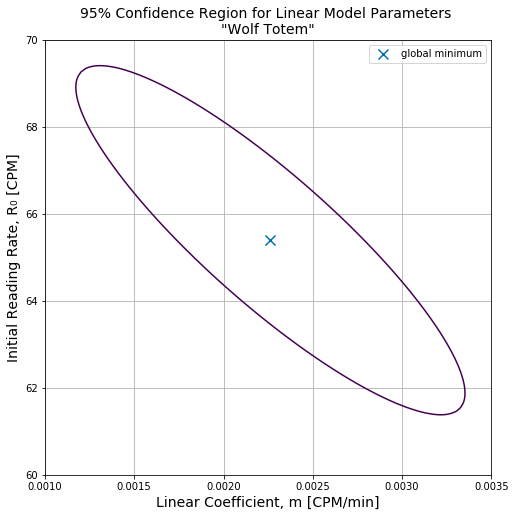

In [9]:
# resolution at which to map SSR in parameter space
R0_res = 110
m_res = 100

# axes in parameter space
R0_vals = np.linspace(60, 70, R0_res)
m_vals = np.linspace(0.001, 0.0035, m_res)

# Map SSR in parameter space.
wt_ssr_map = np.zeros((R0_res, m_res))
for i in range(R0_res):
    for j in range(m_res):
        wt_ssr_map[i,j] = ssr_lin([R0_vals[i], m_vals[j]], wt_t, wt_rr)

# Plot SSR contour corresponding to 95% confidence region.
n = wt_t.size
p = 2
conf_level = 0.95
ssr_threshold = wt_ssr_lin_bf*(1 + p/(n-p)*scipy.stats.f.ppf(q=conf_level, dfn=p, dfd=n-p))

fig,ax = plt.subplots(figsize=(8,8))

x,y = np.meshgrid(m_vals, R0_vals)
ax.contour(x, y, wt_ssr_map, [ssr_threshold])
ax.scatter(wt_lin_bf[1], wt_lin_bf[0], s=100, marker='x', label='global minimum')
ax.set_title('95% Confidence Region for Linear Model Parameters \n\"Wolf Totem\"',
             fontsize=14)
ax.set_xlabel('Linear Coefficient, m [CPM/min]', fontsize=14)
ax.set_ylabel('Initial Reading Rate, R₀ [CPM]', fontsize=14)
ax.legend()
plt.grid()
plt.show()

As expected, the 95 percent confidence region is once again an ellipse. The minimum and maximum relative improvements are:

* If $m = 0.00121$ CPM/min and $R_0 = 69.3$ CPM, then my reading rate improved 11%.
* If $m = 0.00331$ CPM/min and $R_0 = 61.5$ CPM, then my reading rate improved 33%.

### 4.2.3 Linear Model Fit for "InTouch Today"

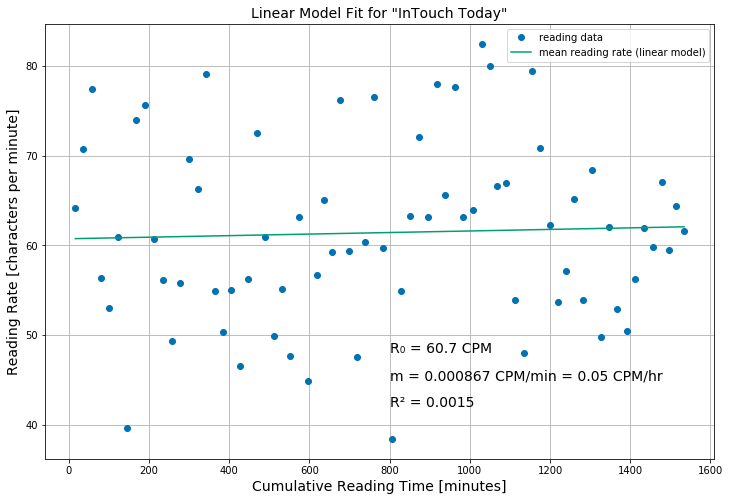

In [10]:
# Determine best-fit parameters for linear model.
itt_lin_bf = scipy.optimize.curve_fit(lin_mod, itt_t, itt_rr)[0]

# best-fit sum of squared residuals for linear model
itt_ssr_lin_bf = ssr_lin(itt_lin_bf, itt_t, itt_rr)

# R^2 for linear model fit
itt_r_sq = round(r_sq(itt_rr, itt_ssr_lin_bf), 4)

# linear model mean reading rate values
itt_lin_mod_rr = lin_mod(itt_t, itt_lin_bf[0], itt_lin_bf[1])

# Plot data and linear model fit.
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(itt_t, itt_rr, 'o', label='reading data')
ax.plot(itt_t, itt_lin_mod_rr, label='mean reading rate (linear model)')
ax.text(800, 48, 'R₀ = '+str(round(itt_lin_bf[0], 1))+' CPM', fontsize=14)
ax.text(800, 45, 'm = '+str(round(itt_lin_bf[1], 6))+' CPM/min = '+str(round(itt_lin_bf[1]*60, 2))+' CPM/hr',
        fontsize=14)
ax.text(800, 42, 'R² = '+str(itt_r_sq), fontsize=14)
ax.set_title('Linear Model Fit for \"InTouch Today\"', fontsize=14)
ax.set_xlabel('Cumulative Reading Time [minutes]', fontsize=14)
ax.set_ylabel('Reading Rate [characters per minute]', fontsize=14)
plt.grid()
plt.legend()
plt.show()

I have not spent as much time reading from this source as I have the other two, so a positive trend is not so apparent. The best-fit linear line does have a positive slope, but the $R^2$ value of 0.0015 is low.

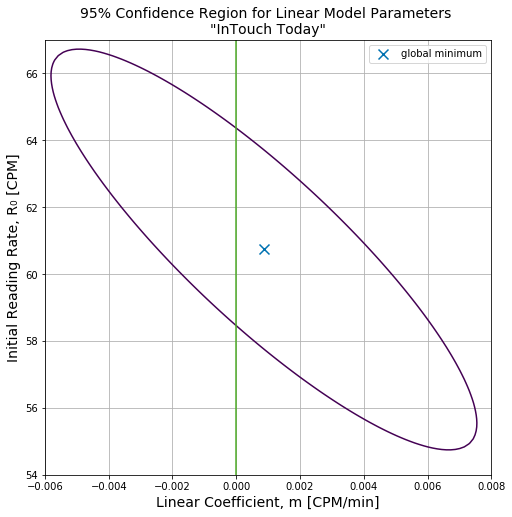

In [11]:
# resolution at which to map SSR in parameter space
R0_res = 110
m_res = 100

# axes in parameter space
R0_vals = np.linspace(54, 67, R0_res)
m_vals = np.linspace(-0.006, 0.008, m_res)

# Map SSR in parameter space.
itt_ssr_map = np.zeros((R0_res, m_res))
for i in range(R0_res):
    for j in range(m_res):
        itt_ssr_map[i,j] = ssr_lin([R0_vals[i], m_vals[j]], itt_t, itt_rr)

# Plot SSR contour corresponding to 95% confidence region.
n = itt_t.size
p = 2
conf_level = 0.95
ssr_threshold = itt_ssr_lin_bf*(1 + p/(n-p)*scipy.stats.f.ppf(q=conf_level, dfn=p, dfd=n-p))

fig,ax = plt.subplots(figsize=(8,8))

x,y = np.meshgrid(m_vals, R0_vals)
ax.contour(x, y, itt_ssr_map, [ssr_threshold])
ax.scatter(itt_lin_bf[1], itt_lin_bf[0], s=100, marker='x', label='global minimum')
ax.set_title('95% Confidence Region for Linear Model Parameters \n\"InTouch Today\"',
             fontsize=14)
ax.set_xlabel('Linear Coefficient, m [CPM/min]', fontsize=14)
ax.set_ylabel('Initial Reading Rate, R₀ [CPM]', fontsize=14)
ax.axvline(x=0, color='#4dac26')
ax.legend()
plt.grid()
plt.show()

The confidence region is once again an ellipse as expected, but this time it intersects the $m=0$ CPM/min axis. In this scenario I fail to reject a null hypothesis stating that my reading rate has not improved at all.

## 4.3 Exponential Decay Model

Define functions used by exponential decay model. I will only fit this model to the *Remembrance of Earth's Past* and *Wolf Totem* data.

In [12]:
# Define function for exponential decay model.
def ed_mod(t, R0, k):
    """
    calculates mean reading rate [CPM]
    t = total time spent reading [min]
    R0 = initial mean reading rate [CPM]
    k = exponential decay coefficient [min^-1]
    """
    # maximum achievable mean reading rate [CPM]
    R_max = 255
    
    rr = R0 + (R_max - R0)*(1 - np.exp(-k*t))
    return rr

# Define functions for calculating sum of squared residuals and R^2.
def ssr_ed(param, t, rr):
    """
    calculates ssr = sum of squared residuals [CPM^2]
    param = vector of parameters used by exponential decay model (R_0, k)
    t = total time spent reading [min]
    rr = mean reading rate [CPM]
    """
    R0 = param[0]
    k = param[1]
    resid = rr - ed_mod(t, R0, k)
    return np.sum(resid**2)

### 4.3.1 Exponential Decay Model Fit for *Remembrance of Earth's Past*

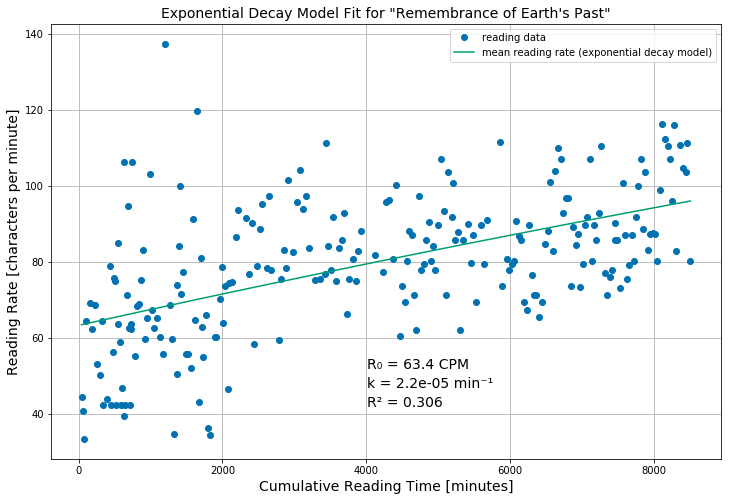

In [13]:
# Determine best-fit parameters for exponential decay model.
rep_ed_bf = scipy.optimize.curve_fit(ed_mod, rep_t, rep_rr, (50,0.001))[0]

# best-fit sum of squared residuals for exponential decay model
rep_ssr_ed_bf = ssr_ed(rep_ed_bf, rep_t, rep_rr)

# R^2 for exponential decay model fit
rep_ed_r_sq = round(r_sq(rep_rr, rep_ssr_ed_bf), 3)

# exponential decay model mean reading rate values
rep_ed_mod_rr = ed_mod(rep_t, rep_ed_bf[0], rep_ed_bf[1])

# Plot data and linear model fit.
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(rep_t, rep_rr, 'o', label='reading data')
ax.plot(rep_t, rep_ed_mod_rr, label='mean reading rate (exponential decay model)')
ax.text(4010, 52, 'R₀ = '+str(round(rep_ed_bf[0], 1))+' CPM', fontsize=14)
ax.text(4010, 47, 'k = '+str(round(rep_ed_bf[1], 6))+' min⁻¹', fontsize=14)
ax.text(4010, 42, 'R² = '+str(rep_ed_r_sq), fontsize=14)
ax.set_title('Exponential Decay Model Fit for \"Remembrance of Earth\'s Past\"', fontsize=14)
ax.set_xlabel('Cumulative Reading Time [minutes]', fontsize=14)
ax.set_ylabel('Reading Rate [characters per minute]', fontsize=14)
plt.grid()
plt.legend()
plt.show()

The exponential decay model fit looks very similar to the linear model fit, but very slight downward curvature can be seen if a straightedge is held up to the model mean reading rate curve. The $R^2$ value of 0.306 is close to the linear model $R^2$ value of 0.304.

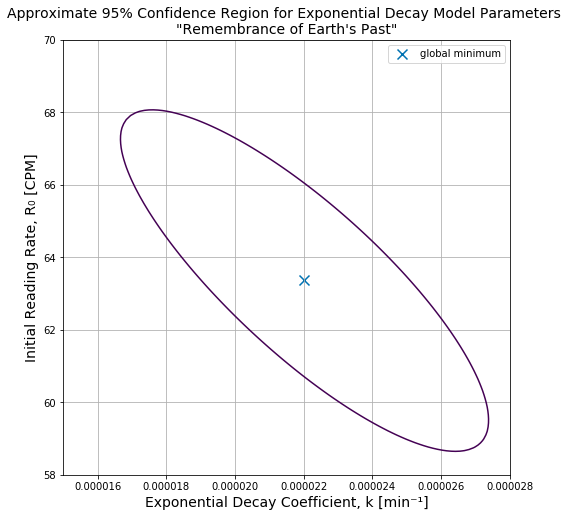

In [14]:
# resolution at which to map SSR in parameter space
R0_res = 110
k_res = 100

# axes in parameter space
R0_vals = np.linspace(58, 70, R0_res)
k_vals = np.linspace(1.5e-5, 2.8e-5, k_res)

# Map SSR in parameter space.
rep_ssr_map = np.zeros((R0_res, k_res))
for i in range(R0_res):
    for j in range(k_res):
        rep_ssr_map[i,j] = ssr_ed([R0_vals[i], k_vals[j]], rep_t, rep_rr)

# Plot SSR contour corresponding to 95% confidence region.
n = rep_t.size
p = 2
conf_level = 0.95
ssr_threshold = rep_ssr_ed_bf*(1 + p/(n-p)*scipy.stats.f.ppf(q=conf_level, dfn=p, dfd=n-p))

fig,ax = plt.subplots(figsize=(8,8))

x,y = np.meshgrid(k_vals, R0_vals)
ax.contour(x, y, rep_ssr_map, [ssr_threshold])
ax.scatter(rep_ed_bf[1], rep_ed_bf[0], s=100, marker='x', label='global minimum')
ax.set_title('Approximate 95% Confidence Region for Exponential Decay Model Parameters \n\"Remembrance of Earth\'s Past\"',
             fontsize=14)
ax.set_xlabel('Exponential Decay Coefficient, k [min⁻¹]', fontsize=14)
ax.set_ylabel('Initial Reading Rate, R₀ [CPM]', fontsize=14)
ax.legend()
plt.grid()
plt.show()

An approximate 95% confidence region is shown above for the exponential decay model applied to the *Remembrance of Earth's Past* data. Such confidence regions are not necessarily ellipsoidal for nonlinear models, but in this instance the confidence region is an ellipse because the model fit only has a slight degree of curvature. 

The minimum and maximum relative mean reading rate improvements of 37% and 69% are similar to the linear model fit.

### 4.3.2 Exponential Decay Model Fit for *Wolf Totem*

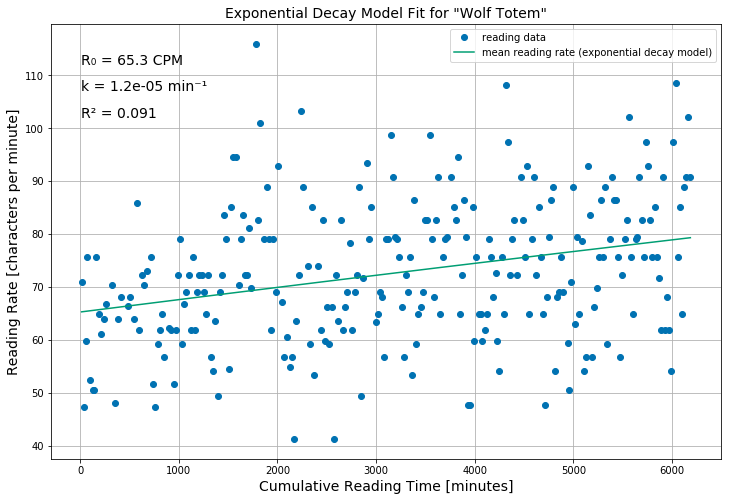

In [15]:
# Determine best-fit parameters for exponential decay model.
wt_ed_bf = scipy.optimize.curve_fit(ed_mod, wt_t, wt_rr, (50,0.001))[0]

# best-fit sum of squared residuals for exponential decay model
wt_ssr_ed_bf = ssr_ed(wt_ed_bf, wt_t, wt_rr)

# R^2 for exponential decay model fit
wt_ed_r_sq = round(r_sq(wt_rr, wt_ssr_ed_bf), 3)

# exponential decay model mean reading rate values
wt_ed_mod_rr = ed_mod(wt_t, wt_ed_bf[0], wt_ed_bf[1])

# Plot data and linear model fit.
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(wt_t, wt_rr, 'o', label='reading data')
ax.plot(wt_t, wt_ed_mod_rr, label='mean reading rate (exponential decay model)')
ax.text(10, 112, 'R₀ = '+str(round(wt_ed_bf[0], 1))+' CPM', fontsize=14)
ax.text(10, 107, 'k = '+str(round(wt_ed_bf[1], 6))+' min⁻¹', fontsize=14)
ax.text(10, 102, 'R² = '+str(wt_ed_r_sq), fontsize=14)
ax.set_title('Exponential Decay Model Fit for \"Wolf Totem\"', fontsize=14)
ax.set_xlabel('Cumulative Reading Time [minutes]', fontsize=14)
ax.set_ylabel('Reading Rate [characters per minute]', fontsize=14)
plt.grid()
plt.legend()
plt.show()

Like the exponential decay model fit to the *Remembrance of Earth's Past* data, the exponential decay model fit to the *Wolf Totem* data also exhibits a small degree of curvature. The $R^2$ value of 0.091 is the same as the $R^2$ value for the linear model, within the number of significant figures used.

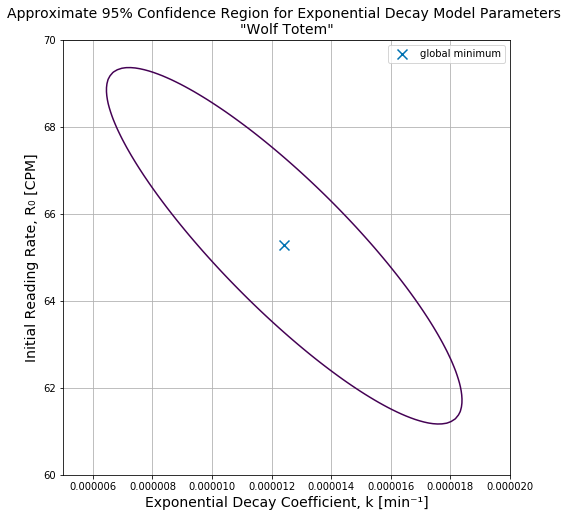

In [16]:
# resolution at which to map SSR in parameter space
R0_res = 110
k_res = 100

# axes in parameter space
R0_vals = np.linspace(60, 70, R0_res)
k_vals = np.linspace(5e-6, 2e-5, k_res)

# Map SSR in parameter space.
wt_ssr_map = np.zeros((R0_res, k_res))
for i in range(R0_res):
    for j in range(k_res):
        wt_ssr_map[i,j] = ssr_ed([R0_vals[i], k_vals[j]], wt_t, wt_rr)

# Plot SSR contour corresponding to 95% confidence region.
n = wt_t.size
p = 2
conf_level = 0.95
ssr_threshold = wt_ssr_ed_bf*(1 + p/(n-p)*scipy.stats.f.ppf(q=conf_level, dfn=p, dfd=n-p))

fig,ax = plt.subplots(figsize=(8,8))

x,y = np.meshgrid(k_vals, R0_vals)
ax.contour(x, y, wt_ssr_map, [ssr_threshold])
ax.scatter(wt_ed_bf[1], wt_ed_bf[0], s=100, marker='x', label='global minimum')
ax.set_title('Approximate 95% Confidence Region for Exponential Decay Model Parameters \n\"Wolf Totem\"',
             fontsize=14)
ax.set_xlabel('Exponential Decay Coefficient, k [min⁻¹]', fontsize=14)
ax.set_ylabel('Initial Reading Rate, R₀ [CPM]', fontsize=14)
ax.legend()
plt.grid()
plt.show()

An approximate 95 percent confidence region for the parameters of the exponential decay model fit to the *Wolf Totem* data is show above. Like the confidence region for the *Remembrance of Earth's Past* data, it is ellipsoidal. Minimum and maximum relative reading rate improvements of 11% and 34% are also similar to the linear model.

## 4.4 Reading Rate Model Extrapolations

Finally, I will extrapolate the linear and exponential decay models in an attempt to estimate how long it will take to reach a target mean reading rate of 200 CPM.

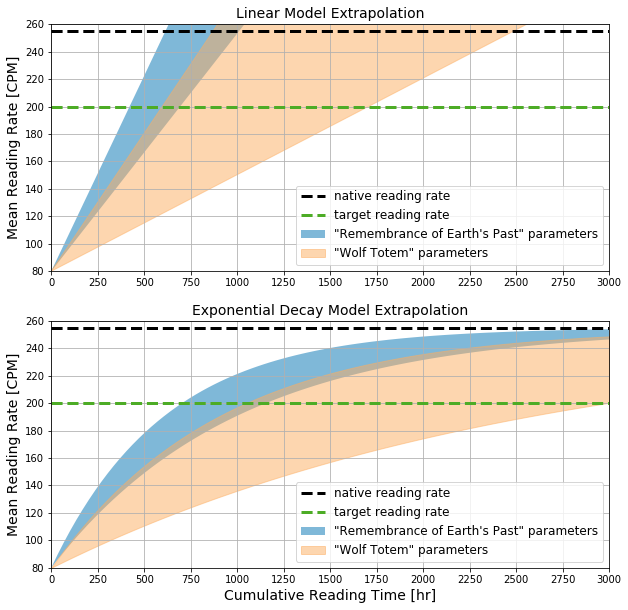

In [17]:
# native reading rate [CPM]
max_rr = 255

# minimum and maximum linear model coefficients from 95% confidence regions [CPM/min]
rep_m_min = 0.002887
rep_m_max = 0.004749
wt_m_min = 0.001173
wt_m_max = 0.003352

# minimum and maximum exponential decay model coefficient from 95% confidence regions [min^-1]
rep_k_min = 1.67E-05
rep_k_max = 2.74E-05
wt_k_min = 6.45E-06
wt_k_max = 1.84E-05

# hypothetical initial mean reading rate [CPM]
rr0 = 80

# hypothetical cumulative reading time [min]
t = np.linspace(0, 200000, 100)

# linear model mean reading rate extrapolations [CPM]
rep_lin_min = lin_mod(t, rr0, rep_m_min)
rep_lin_max = lin_mod(t, rr0, rep_m_max)
wt_lin_min = lin_mod(t, rr0, wt_m_min)
wt_lin_max = lin_mod(t, rr0, wt_m_max)

# exponential decay model mean reading rate extrapolations [CPM]
rep_ed_min = ed_mod(t, rr0, rep_k_min)
rep_ed_max = ed_mod(t, rr0, rep_k_max)
wt_ed_min = ed_mod(t, rr0, wt_k_min)
wt_ed_max = ed_mod(t, rr0, wt_k_max)

# Plot results.
fig,(ax0,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

ax0.fill_between(t/60, rep_lin_min, rep_lin_max, alpha=0.5, 
                 label='\"Remembrance of Earth\'s Past\" parameters')
ax0.fill_between(t/60, wt_lin_min, wt_lin_max, color='#fdae61', alpha=0.5, label='\"Wolf Totem\" parameters')

ax1.fill_between(t/60, rep_ed_min, rep_ed_max, alpha=0.5, 
                 label='\"Remembrance of Earth\'s Past\" parameters')
ax1.fill_between(t/60, wt_ed_min, wt_ed_max, color='#fdae61', alpha=0.5, label='\"Wolf Totem\" parameters')

ax0.set_xlim(0,3000)
ax1.set_xlim(0,3000)

ax0.set_ylim(80,260)
ax1.set_ylim(80,260)

ax0.axhline(y=255, linestyle='--', linewidth=3, color='k', label='native reading rate')
ax0.axhline(y=200, linestyle='--', linewidth=3, color='#4dac26', label='target reading rate')

ax1.axhline(y=255, linestyle='--', linewidth=3, color='k', label='native reading rate')
ax1.axhline(y=200, linestyle='--', linewidth=3, color='#4dac26', label='target reading rate')

ax0.legend(loc='lower right', fontsize=12)
ax1.legend(loc='lower right', fontsize=12)

ax0.set_title('Linear Model Extrapolation', fontsize=14)
ax1.set_title('Exponential Decay Model Extrapolation', fontsize=14)
ax1.set_xlabel('Cumulative Reading Time [hr]', fontsize=14)
ax0.set_ylabel('Mean Reading Rate [CPM]', fontsize=14)
ax1.set_ylabel('Mean Reading Rate [CPM]', fontsize=14)

ax0.grid(which='both')
ax1.grid()

plt.setp((ax0,ax1), xticks=np.arange(0,3001,250))

plt.show()

The plots above show linear and exponential decay model extrapolations made assuming a current mean reading rate of 80 CPM and the ranges of $m$ and $k$ parameter values enclosed in each 95 percent confidence region.

With regards to how long it will take to reach a mean reading rate of 200 CPM, the models make a wide range of predictions.

### 4.4.1 Linear Model Predictions to Reach 200 CPM Mean Reading Rate
* *Remembrance of Earth's Past* data: 421 to 693 hours.
* *Wolf Totem* data: 597 to 1705 hours.

### 4.4.2 Exponential Decay Model Predictions to Reach 200 CPM Mean Reading Rate
* *Remembrance of Earth's Past* data: 704 to 1155 hours.
* *Wolf Totem* data: 1048 to 2991 hours.

# 5. Conclusions

## 5.1 Project Objectives
>How much can I confidently say my reading rate has improved after this practice?

The varying difficulty level of each reading material source precludes any simple conclusions about absolute mean reading rate increases in CPM. However, if it is assumed that relative mean reading rate increases induced by reading material from one source yields an identical relative mean reading rate increase for material from a different source, then the relative mean reading rate increases for books read in sequence can be multiplied together to yield a total relative mean reading rate increase.

The linear and exponential decay models yielded similar estimates of relative mean reading rate increase for the *Remembrance of Earth's Past* and *Wolf Totem* data. As previously discussed, the 95 percent confidence regions for the model parameters resulted in a confidence interval of possible relative increases. A 95 percent confidence interval for the total relative mean reading rate increase brought about by reading these two books is (1.37)×(1.11) = 1.52 to (1.67)×(1.33) = 2.22, or 52 to 122 percent.

>What model of reading rate as a function of total time spent reading appears to fit my reading data best?

Enough downward curvature is observable in the *Remembrance of Earth's Past* and *Wolf Totem* data to yield a plausible range of $k$ parameter values in the 95 percent confidence region plots. However, not enough downward curvature is observable to reject the linear model. I therefore do not have a conclusive answer to this question yet, and I will only be able to make any conclusions with more data.

>Assuming that the previously determined best-fit model is correct, when can I expect to reach a reading rate comparable to that of a native speaker?

With the objective of reaching a mean reading rate of approximately 200 CPM within a reasonable time frame, but without a conclusive answer to the previous question, it would be most prudent to select the exponential decay model because it yields more conservative predictions. Assuming that *Remembrance of Earth's Past* represents material on the easier range of things I would like to read and that *Wolf Totem* represents material on the more difficult range, a target of 1000 further hours of reading on top of the 270 I have already accrued is a goal I can accomplish in the next few years.

## 5.2 Other Conclusions

### 5.2.1 The Need for Large Volumes of Reading Material and High Temporal Resolution

If someone reading this desires to perform a similar analysis and make similar predictions regarding their second-language reading rate, then reading through this project report has hopefully convinced them that the best course of action is to select long books (or other sources with a high volume of material at the same approximate reading level—e.g., daily news essays) and then collect reading performance data on a daily basis. At the onset of this project I purposefully selected long books that took me more than a year to plod through, and even then the high variability of my measured reading rates resulted in a wide range of possible model parameter values and predictions.

### 5.2.2 Opportunities for Further Study

As discussed in the literature review section, I was unable to find any second-language learning studies that match what I have presented here in terms of the temporal resolution of data collected. Whether or not my conclusions can be generalized to all learners of Mandarin Chinese or other languages is an open question. The proliferation of smartphone technology makes such granular collection of reading performance data possible on a large-scale.

# 6. Bibliography

* Beglar, David, and Alan Hunt. 2014. “Pleasure Reading and Reading Rate Gains.” Reading in a Foreign Language 26 (1): 29–48. https://eric.ed.gov/?id=EJ1031315.
* Draper, Norman Richard, and Laurence H. Smith. 1998. Applied Regression Analysis. Wiley.
* Murphy, Kevin P. 2012. Machine Learning: A Probabilistic Perspective. First. Cambridge, MA: The MIT Press.
* Trauzettel-Klosinski, Susanne, and Klaus Dietz. 2012. “Standardized Assessment of Reading Performance: The New International Reading Speed Texts IReST.” Investigative Ophthalmology & Visual Science 53 (9): 5452–61. https://doi.org/10.1167/iovs.11-8284.